In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import make_classification

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
x,y = make_classification(n_samples=100,n_features=10,n_informative=5,n_redundant=5,n_classes=2,random_state=1)

In [7]:
x

array([[-8.74350744e-01,  1.81604669e+00, -7.62103682e-01,
         1.22679502e+00, -2.43879339e+00, -7.48151503e-01,
        -1.25515129e+00,  8.06747465e-01, -9.35662041e-01,
         6.24055148e-01],
       [ 3.09671698e+00, -1.80062337e+00,  1.02303220e+00,
        -7.56601960e-01,  2.80558895e+00, -4.05762913e+00,
         2.60808300e+00, -1.48910941e+00,  1.36293257e+00,
         1.56063525e+00],
       [ 5.87576256e-01,  2.07297434e+00, -1.69892932e+00,
         2.11492601e+00,  4.20509655e-01, -9.78203247e-01,
         6.10270887e-01,  3.08959501e-01,  5.09206436e-01,
        -5.21427534e-01],
       [-1.05658617e+00, -3.65510254e-01,  1.32900456e+00,
        -2.64370668e+00,  3.86341951e+00, -1.55900486e+00,
         6.81978156e+00, -4.16439796e-01,  4.77774991e+00,
        -2.01200117e+00],
       [-2.66824289e+00,  2.95843422e+00,  7.26812297e-01,
        -1.55808123e+00,  2.74465539e+00, -1.40185210e+00,
         6.86476146e+00,  2.34627921e+00,  5.70584115e+00,
        -1.

In [8]:
y

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)

In [11]:
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(x_test)

In [14]:
y_pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [15]:
y_pred_proba = model.predict_proba(x_test)[:,1]

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [17]:
print(confusion_matrix(y_test,y_pred))

[[13  4]
 [ 0 16]]


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       0.80      1.00      0.89        16

    accuracy                           0.88        33
   macro avg       0.90      0.88      0.88        33
weighted avg       0.90      0.88      0.88        33



In [19]:
print(accuracy_score(y_test,y_pred))

0.8787878787878788


In [20]:
from sklearn.metrics import roc_curve,auc

In [21]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)

In [22]:
roc_auc = auc(fpr,tpr)

In [23]:
roc_auc

0.9522058823529411

Text(0, 0.5, 'tpr')

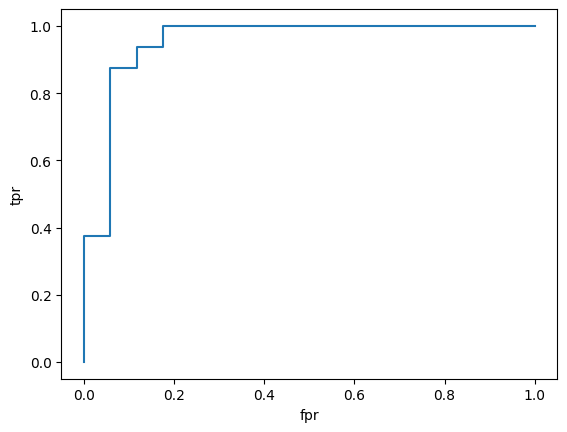

In [24]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

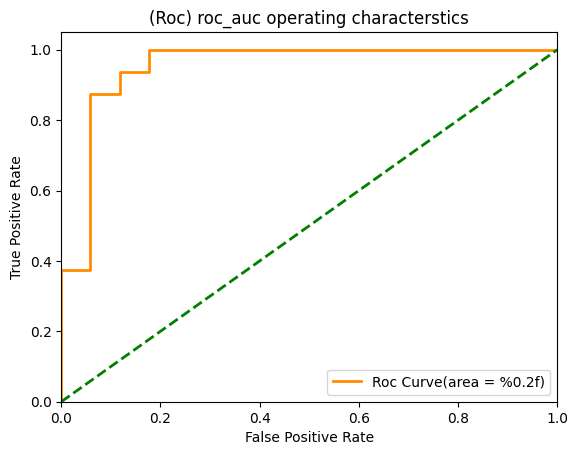

In [25]:
plt.Figure(figsize=(8,6))
plt.plot(fpr,tpr,color = 'darkorange',linewidth = 2,label = 'Roc Curve(area = %0.2f)')
plt.plot([0,1],[0,1],color='green',linewidth = 2,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(Roc) roc_auc operating characterstics')
plt.legend(loc = 'lower right')
plt.show()

### Finding optimal cuttoff

In [45]:
thresholds  = np.linspace(0,1,100)
precision = []
accuracy = []
recalls = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
print(y_pred_threshold)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [81]:
precisions = precision_score(y_test,y_pred_threshold)

In [79]:
precisions

0.0

In [55]:
recall = recall_score(y_test,y_pred_threshold)

In [56]:
accuracys= accuracy_score(y_test,y_pred_threshold)

In [82]:
precision.append(precisions)
accuracy.append(accuracys)
recalls.append(recall)

In [83]:
precisions,recall,accuracys,threshold

(0.0, 0.0, 0.5151515151515151, 1.0)

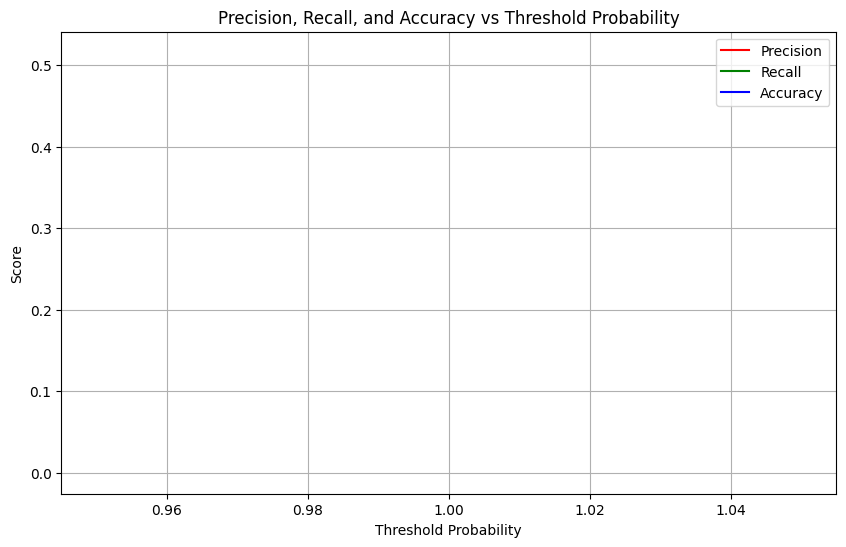

In [87]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(threshold, precisions,color = 'red' ,label='Precision')
plt.plot(threshold, recall,color='green', label='Recall')
plt.plot(threshold, accuracys,color='blue', label='Accuracy')
plt.xlabel('Threshold Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and Accuracy vs Threshold Probability')
plt.legend()
plt.grid(True)
plt.show()